<a href="https://colab.research.google.com/github/rheaannboby/TripAdvisorReviewAnalysis/blob/main/Sentiment_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IMPORT LIBRARIES AND READ THE DATASET**

In [ ]:
import pandas as pd
import numpy as np
import warnings
from nltk.stem.snowball import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
warnings.filterwarnings('ignore')
train_data = pd.read_csv('FinalReviewsDataset.csv')
train_data.head(5)

,Unnamed: 0,Reviews,Ratings,Sentiment_Score,Sentiment,Label
0,0,My Review is purely about FOOD and nothing els...,1.0,0.9700,Positive,1
1,1,"It is a great place to visit , which will not ...",5.0,0.9396,Positive,1
2,2,The prawn curry and the fish tandor was amazin...,4.0,0.8860,Positive,1
3,3,"Before i write furthermore, I would like to th...",5.0,0.9784,Positive,1
4,4,Enjoyed a dinner at the place with my Colleagu...,4.0,0.9267,Positive,1


**DISPLAYING THE ATTRIBUTES OF DATASET**

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 880 entries, 0 to 879
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       880 non-null    int64  
 1   Reviews          880 non-null    object 
 2   Ratings          880 non-null    float64
 3   Sentiment_Score  880 non-null    float64
 4   Sentiment        880 non-null    object 
 5   Label            880 non-null    int64  
dtypes: float64(2), int64(2), object(2)
memory usage: 41.4+ KB


**DISPLAY FIRST FIVE POSITIVE REVIEWS**

In [ ]:
pd.set_option('max_colwidth',1800)
train_data[train_data.Label == 1][0:5]

,Unnamed: 0,Reviews,Ratings,Sentiment_Score,Sentiment,Label
0,0,"My Review is purely about FOOD and nothing else.\n\nWe ordered for their Famous broccoli Badami and it came in all Dry. By the way, have the same dish in the South Goa branch and you would understand what I am saying.\n\nNext, we called...the Cheff and he told us he would make something in broccoli and to our surprise we got Broccoli Manchurian. (as per him it was pan tossed Broccoli) see the Image.\n\nIn Fish, I ordered simple fish curry but Fish Curry was way beyond salty and not worth eating.\n\nFinally, we came back empty stomachs.\n\nI am Surprised that Cheff Pal who is the head Chef and has amazing recipes did not check this Branch.\n\nMr. Xavier Furtado (Owner) I had met you years back and your moto was to give the best Food with the best experience. But Bangalore needs a relook it is not even near to your original Idea.More",1.0,0.9700,Positive,1
1,1,"It is a great place to visit , which will not disappoint you with it's ambience, live music and sea food. The add on points are it's extremely courteous staff and their great service's!!More",5.0,0.9396,Positive,1
2,2,The prawn curry and the fish tandor was amazing ..must try for anyone who visit this place.\n\nOverall Good food and wonderful sea foodMore,4.0,0.8860,Positive,1
3,3,"Before i write furthermore, I would like to thank manager there who is very courteous and friendly. The ambience is great. Food was delicious and all the services were excellent. Usually there is a chance that you will have a delay in getting your food...or drinks. This was our first outing this year for a Sunday brunch! Thank yiu fisherman’s wharf!More",5.0,0.9784,Positive,1
4,4,"Enjoyed a dinner at the place with my Colleagues and I must say it's a fab restaurant. Ideal place for socializing. Good food but the choice of vegetarian was limited, excellent ambiance and friendly/enthusiastic/courteous staff members. Will definitely come back for more.More",4.0,0.9267,Positive,1


****

**DISPLAY THE FIRST FIVE NEGATIVE REVIEWS**

In [ ]:
pd.set_option('max_colwidth',1800)
train_data[train_data.Label == 0][0:4]

,Unnamed: 0,Reviews,Ratings,Sentiment_Score,Sentiment,Label
9,9,"We went to this place for dinner on 17/9/19. As it was Tuesday, the place was not crowded that much. We got a good table facing the bar. This place was very huge. The place was specialising in Goan cuisines. \n\nAnyway, we ordered Whisky and...starters, paneer was corky and oily. The garlic bread with cheese was good. After few drinks, we ordered the mains. A yellow dal and roti. Dal was very watery.\n\nFinally, a long bill, separated for food and drinks, came and at the corner, it was written Rs.5714 and demanded us to pay this. I was sure that my bills would not have reached that level. So, I checked and told him that it was only Rs.3750! \n\nAs usual, he felt sorry and told that it was a mistake and Rs. 5714 pertained to another table nearby! Then, we called the Supervisor and asked why the mistake on the bill was always on higher side! He said it was genuine mistake! He was not genuine in his apology. \n\nMaybe, he thought, he could get away with me, that too after few drinks! Totally disappointed with this kind of cheap shot from a restaurant, which looked otherwise good. \n\nBuyers beware!More",1.0,0.3553,Negative,0
15,15,"It's decent.\n\nPlace is good, food is nice and service is average.\n\nTried the butter garlic prawns and pork in plum sauce. Nothing wow nothing yuck. Nice. Floating within levels of tolerance and no expectations.More",3.0,0.0762,Negative,0
23,23,My Rating is 0/5.\nWorst Food i have ever had.\nWorst Service - No response from suppliers when food is too bad.\ni felt worried while eating non-veg.\nNo need to think about to veg its more than bad when compare with non-veg items.\n#I...More,1.0,-0.9686,Negative,0
28,28,"For all seafood lovers, this is a place in Bangalore that you can't miss, in fact you shouldn't. A truly amazing dining experience. Went for a lunch today with my family and I must say it was hilarious. I had been there few months ago...More",5.0,0.2654,Negative,0


**COUNT PLOT TO COMPARE THE NUMBER OF POSITIVE AND NEGATIVE SENTIMENTS**

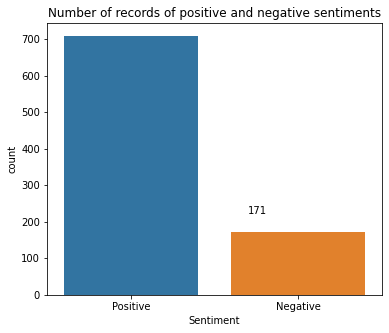

In [ ]:
#count plot to compare the number of positive and negative sentiments.
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline
plt.figure(figsize=(6,5))
plt.title("Number of records of positive and negative sentiments")
plot = sn.countplot(x = 'Sentiment', data=train_data)
for p in plot.patches:
    plot.annotate(p.get_height(),(p.get_x()+0.1 ,p.get_height()+50))

In [ ]:
import nltk

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords 

In [ ]:
my_stop_words = set(stopwords.words('english')) 

In [ ]:
print(my_stop_words)

{"mustn't", "that'll", 'he', 'but', 'just', 'ourselves', 'there', 'where', 'yourselves', 'theirs', 'before', 'them', 'had', 'has', 'this', 'a', 'who', "mightn't", "weren't", "haven't", 'is', "won't", 'most', 'so', 'yours', 't', 'will', 'isn', 'does', 'whom', 'at', 'hasn', 'having', 'then', 'same', 'on', 'wasn', 'when', 'or', 'up', 'only', 'needn', 'own', 'have', 'doesn', 'the', 'that', "hasn't", 'i', 'were', 'mustn', 'himself', 'aren', 'she', 'for', 'didn', 'off', 'itself', 'other', 'with', 'all', "she's", 'into', 'did', 'an', 'until', 'couldn', 'll', 'such', 'very', 'through', 'if', 'over', 'its', 'd', "it's", "you're", 'don', 'of', 'him', 'between', 'are', 'which', 'be', 'once', 'now', 'down', "don't", 'being', 'was', 'both', 're', 'here', 'her', 'wouldn', 'not', 'it', 'how', 'further', 'ain', 'won', 'you', 'hadn', 'these', 'do', 'what', 'your', 'some', "couldn't", 'yourself', 'hers', "isn't", 'as', 'y', "wasn't", 'their', 'more', 's', 'than', 'below', 'while', 'from', 'against', 've

**TEXT PRE-PROCESSING**

In [ ]:
count_vectorizer =  CountVectorizer(stop_words= my_stop_words, max_features= 1000)

In [ ]:
feature_vector =  count_vectorizer.fit(train_data.Reviews)

In [ ]:
train_ds_features =  count_vectorizer.transform(train_data.Reviews)

In [ ]:
features = feature_vector.get_feature_names()

In [ ]:
features_counts = np.sum(train_ds_features.toarray(), axis = 0)

In [ ]:
features_counts = pd.DataFrame(dict(features =  features, counts = features_counts))

In [ ]:
features_counts.sort_values("counts", ascending= False)[0:15]

,features,counts
324,food,671
636,place,555
365,good,519
38,ambience,261
764,service,233
368,great,232
720,restaurant,206
362,goan,185
562,nice,168
37,ambiance,153


**BUILD MODEL FOR SENTIMENT CLASSIFICATION**

**SPLIT DATA INTO TRAINING AND VALIDATION SETS**

In [ ]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y =  train_test_split(train_ds_features, train_data.Sentiment, 
                                                     test_size = 0.3, random_state = 42)

**NAIVE BAYES MODEL**

In [ ]:
from sklearn.naive_bayes import BernoulliNB
nb_clf = BernoulliNB()
nb_clf.fit(train_x.toarray(), train_y)

BernoulliNB()

**PREDICTION ON TEST CASE**

In [ ]:
test_ds_predicted = nb_clf.predict(test_x.toarray())

**FINDING MODEL ACCURACY**

In [ ]:
from sklearn import metrics
print(metrics.classification_report(test_y,test_ds_predicted))

              precision    recall  f1-score   support

    Negative       0.59      0.29      0.39        55
    Positive       0.84      0.95      0.89       209

    accuracy                           0.81       264
   macro avg       0.71      0.62      0.64       264
weighted avg       0.78      0.81      0.78       264



**CONFUSION MATRIX**

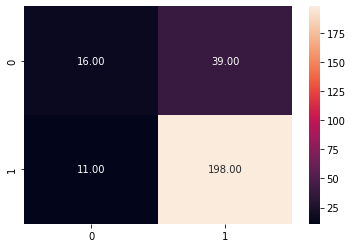

In [ ]:
cm = metrics.confusion_matrix(test_y, test_ds_predicted)
sn.heatmap(cm, annot=True, fmt = '.2f')

In [ ]:
import pickle
with open('models.pkl', 'wb') as file:
  pickle.dump(nb_clf, file)